## Observations and Insights 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [20]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [21]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [22]:
# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

In [23]:
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice.
mouse_count= merged_df["Mouse ID"].count()
mouse_count

1893

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Optional: Get all the data for the duplicate mouse ID.
get_dup_mice_data = merged_df[merged_df.duplicated(['Mouse ID'])]
get_dup_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dup_mice_df = merged_df.drop_duplicates("Mouse ID")
clean_dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [47]:
# Checking the number of mice in the clean DataFrame. I don't think I need this because it states it up above that there are 249 rows
clean_df = clean_dup_mice_df["Mouse ID"].count()
clean_df

249

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#is there any way to use describe with groupby?

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#calculate mean on column Drug Regimen grouped by drug
mean = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

#calculate median on column Drug Regimen grouped by drug
median =  merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

#calculate variance on column Drug Regimen grouped by drug
variance = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

#calculate standard deviation on column Drug Regimen grouped by drug
standard_dv = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

#calculate SEM of the tumor volum on column Drug Regimen grouped by drug; Return unbiased standard error of the mean over requested axis.
sem = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
#create summary frame of data to display calculations created above; this feel like the same ask as below



In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [77]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
clean_df = pd.DataFrame(merged_df.groupby(["Drug Regimen"]).count()).reset_index()

#renaming it more cohesive and eliminating extra columns
mice_tested = clean_df[["Drug Regimen", "Mouse ID"]]
mice_tested = mice_tested.set_index("Drug Regimen")
mice_tested

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


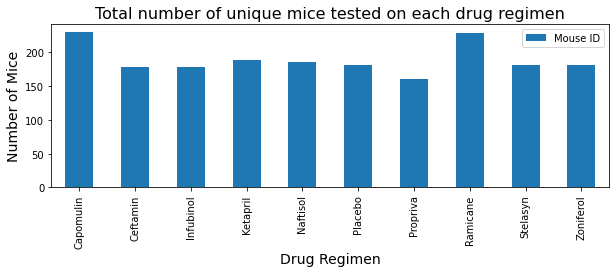

<Figure size 432x288 with 0 Axes>

In [80]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#create chart and set x & y label size
mice_tested.plot(kind="bar", figsize=(10,3))
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice", fontsize = 14)
#set title and layout
plt.title("Total number of unique mice tested on each drug regimen", fontsize = 16)
plt.show()
plt.tight_layout()
#legend.remove() I CAN'T FIGURE OUT HOW TO REMOVE THE MOUSEID from the chart

In [79]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
bygender = mouse_meta.groupby("Sex").count()#.reset_index()
bygender
#renaming it more cohesive and eliminating extra columns
#male_female = clean_df[["Sex"]]
#male_female_count = male_female_count.set_index("Sex")
#male_femail_count

NameError: name 'mouse_meta' is not defined

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
